In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from keras.models import Sequential
from keras.layers import Dense,MaxPooling2D,Flatten,Conv2D
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
data = fashion_mnist.load_data()

In [3]:
(X_train,y_train),(X_test,y_test) = data

In [4]:
X_train.shape

(60000, 28, 28)

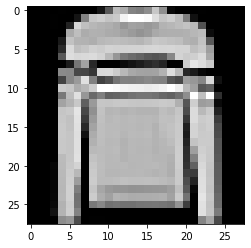

In [5]:
plt.imshow(X_train[5],"gray")

In [6]:
y_train[5]

2

In [7]:
X_train.max()

255

In [8]:
X_train = X_train /255

In [9]:
X_test.max()

255

In [10]:
X_test = X_test / 255

In [11]:
X_train = X_train.reshape(60000, 28, 28,1)

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
X_test = X_test.reshape(10000, 28, 28,1)

In [14]:
y_train = to_categorical(y_train)

In [15]:
y_test = to_categorical(y_test)

In [16]:
model = Sequential()

In [17]:
model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))

In [18]:
model.add(MaxPooling2D((2,2)))

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(256,activation='relu'))

In [21]:
model.add(Dense(64,activation='relu'))

In [22]:
model.add(Dense(10,activation='softmax'))

In [23]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.fit(x=X_train,y=y_train,batch_size=32,epochs=5,verbose=1)

Epoch 1/5
60000/60000 [==============================] - 72s 1ms/step - loss: 0.4061 - acc: 0.8534
Epoch 2/5
60000/60000 [==============================] - 72s 1ms/step - loss: 0.2767 - acc: 0.8984
Epoch 3/5
60000/60000 [==============================] - 75s 1ms/step - loss: 0.2443 - acc: 0.9120
Epoch 4/5
60000/60000 [==============================] - 75s 1ms/step - loss: 0.2263 - acc: 0.9206
Epoch 5/5
60000/60000 [==============================] - 77s 1ms/step - loss: 0.2119 - acc: 0.9248


In [35]:
model.predict_classes(X_test[:2])

array([9, 2], dtype=int64)

In [32]:
_, test = data 

In [33]:
_,y_test = test

In [34]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [36]:
predicted = model.predict_classes(X_test)

In [37]:
confusion_matrix(y_test,predicted)

array([[938,   0,  15,   8,   6,   3,  24,   0,   6,   0],
       [  8, 970,   0,  11,   5,   0,   1,   0,   5,   0],
       [ 25,   1, 847,   6,  68,   1,  48,   0,   4,   0],
       [ 39,   1,  16, 889,  26,   1,  18,   0,  10,   0],
       [  1,   0,  54,  27, 869,   1,  44,   0,   4,   0],
       [  0,   0,   0,   0,   0, 976,   0,  16,   1,   7],
       [230,   1,  74,  17,  68,   0, 597,   0,  13,   0],
       [  0,   0,   0,   0,   0,  11,   0, 982,   0,   7],
       [  2,   0,   0,   1,   2,   3,   0,   2, 990,   0],
       [  1,   0,   0,   0,   0,   9,   0,  55,   0, 935]], dtype=int64)

In [39]:
print(classification_report(y_test,predicted))

             precision    recall  f1-score   support

          0       0.75      0.94      0.84      1000
          1       1.00      0.97      0.98      1000
          2       0.84      0.85      0.84      1000
          3       0.93      0.89      0.91      1000
          4       0.83      0.87      0.85      1000
          5       0.97      0.98      0.97      1000
          6       0.82      0.60      0.69      1000
          7       0.93      0.98      0.96      1000
          8       0.96      0.99      0.97      1000
          9       0.99      0.94      0.96      1000

avg / total       0.90      0.90      0.90     10000

